<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("Walmart_Store_sales.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [8]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


# DATA EXPLORATION AND PROCESSING

In [9]:
dataset.shape

(150, 8)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [11]:
data_desc = dataset.describe(include='all')
print(dataset.shape)
data_desc

(150, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [12]:
px.histogram(dataset["Weekly_Sales"])

In [10]:
# Univariate analysis
from plotly.subplots import make_subplots

# Distribution of each numeric variable
num_features = ['Weekly_Sales']
fig1 = make_subplots(rows = len(num_features), cols = 1, subplot_titles = num_features)
for i in range(len(num_features)):
    fig1.add_trace(
        go.Histogram(
            x = dataset[num_features[i]], nbinsx = 4),
        row = i + 1,
        col = 1)
fig1.update_layout(
        title = go.layout.Title(text = "Distribution of quantitative variables", x = 0.5), showlegend = False, 
            autosize=False, height=500)
fig1.show()

In [13]:
df = dataset.copy()

In [14]:
# trier le dataframe avec les dates assendantes
df = df.sort_values(["Date"])

In [15]:
# remove empty rows of date and Weekly_Sales 
df = df.dropna(subset = ["Date","Weekly_Sales"], axis = 0)

In [16]:
# replace empty Temperature rows with mean : df["Temperature"] = df["Temperature"].fillna(df.Temperature.mean())
# remplacer les valeurs nulles avec la valeur Temperateure de la semaine précédentes 
df["Temperature"] = df["Temperature"].fillna(method = "ffill")

In [17]:
#remplacer les valeurs nulles avec la valeur Fuel_Price de la semaine précédentes 
df["Fuel_Price"] = df["Fuel_Price"].fillna(method = "ffill")

In [18]:
#remplacer les valeurs nulles avec la valeur Fuel_Price de la semaine précédentes 
df["CPI"] = df["CPI"].fillna(method = "ffill")

In [19]:
# replace empty Unemployment rows with median
df["Unemployment"] = df["Unemployment"].fillna(df.Unemployment.median())

In [20]:
df["Holiday_Flag"] = df["Holiday_Flag"].fillna(float("0"))

In [21]:
df.Temperature.mean()

61.1483898305085

# Data Visualisation

In [24]:
# convertir le format Objet en format Date
df['Date']= pd.to_datetime(df['Date'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 50 to 110
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         118 non-null    float64       
 1   Date          118 non-null    datetime64[ns]
 2   Weekly_Sales  118 non-null    float64       
 3   Holiday_Flag  118 non-null    float64       
 4   Temperature   118 non-null    float64       
 5   Fuel_Price    118 non-null    float64       
 6   CPI           118 non-null    float64       
 7   Unemployment  118 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 8.3 KB


In [26]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
50,13.0,2012-01-06,2035431.39,0.0,61.11,3.788,130.959226,5.965
14,17.0,2010-01-10,829207.27,0.0,60.07,2.853,126.234600,6.885
61,10.0,2012-02-03,1990371.02,0.0,57.62,3.882,130.645793,7.545
20,7.0,2010-02-04,561145.14,0.0,38.26,2.725,189.704822,8.963
47,19.0,2010-02-07,1549018.68,0.0,66.25,2.958,132.521867,8.099


## Diagrammes Chronologiques

### Representation des ventes hebdomadaires sur le temps (de deux manières)

In [27]:
df['Year'] = df['Date'].dt.year 
df['Month'] = df['Date'].dt.month 
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
50,13.0,2012-01-06,2035431.39,0.0,61.11,3.788,130.959226,5.965,2012,1
14,17.0,2010-01-10,829207.27,0.0,60.07,2.853,126.234600,6.885,2010,1
61,10.0,2012-02-03,1990371.02,0.0,57.62,3.882,130.645793,7.545,2012,2
20,7.0,2010-02-04,561145.14,0.0,38.26,2.725,189.704822,8.963,2010,2
47,19.0,2010-02-07,1549018.68,0.0,66.25,2.958,132.521867,8.099,2010,2


<AxesSubplot:title={'center':'Evolution des ventes entre 2010 et 2013'}, xlabel='Date'>

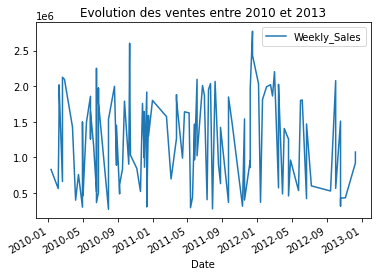

In [28]:
df.plot(x="Date", y="Weekly_Sales", 
           title="Evolution des ventes entre 2010 et 2013",
           legend=True)

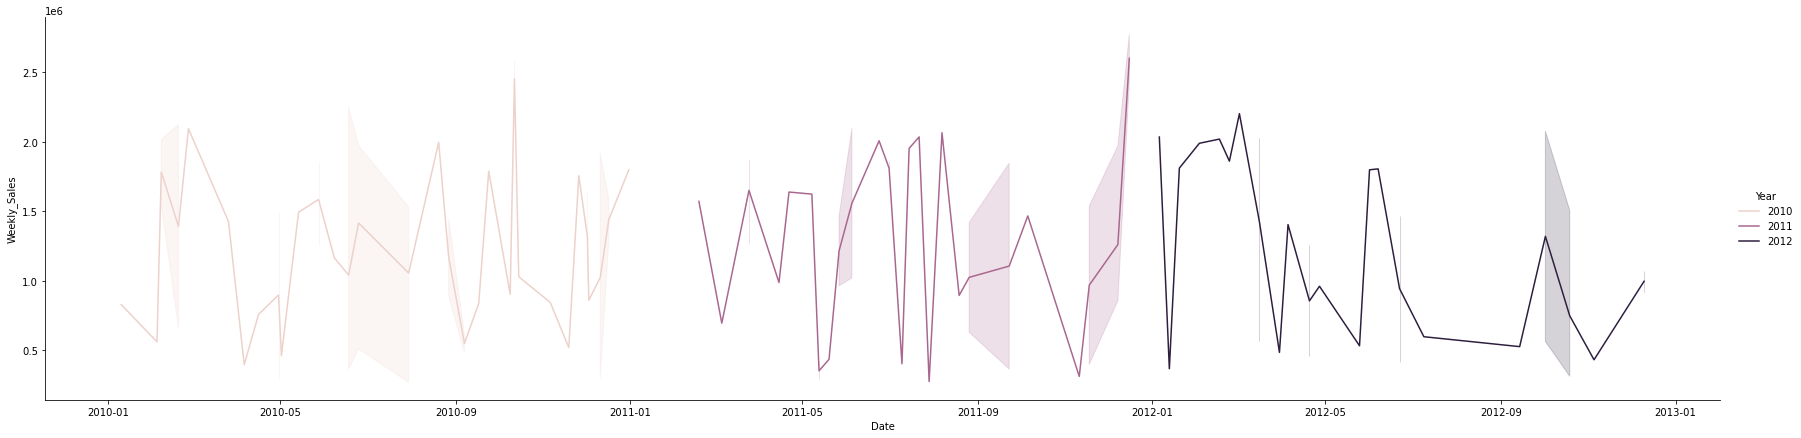

In [25]:
sns.relplot(
        x=df['Date'],
        y=df['Weekly_Sales'],
        hue= df['Year'],
        data = df,
        kind='line',
        height=6,
        aspect=4,
       
        
    )
plt.show()

## Evolution entre 2010 et 2012

In [29]:
df_2010 = df[df["Year"]==2010]
df_2011 = df[df["Year"]==2011]
df_2012 = df[df["Year"]==2012]

In [30]:
df_2010.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
14,17.0,2010-01-10,829207.27,0.0,60.07,2.853,126.234600,6.885,2010,1
20,7.0,2010-02-04,561145.14,0.0,38.26,2.725,189.704822,8.963,2010,2
47,19.0,2010-02-07,1549018.68,0.0,66.25,2.958,132.521867,8.099,2010,2
99,13.0,2010-02-07,2018314.71,0.0,78.82,2.814,126.139200,7.951,2010,2
143,3.0,2010-04-06,396968.80,0.0,78.53,2.705,214.495838,7.343,2010,4


Text(0.5, 0, 'Year')

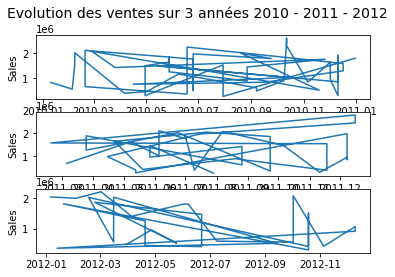

In [31]:
# on définit les données à utiliser
data=[df_2010,df_2011, df_2012]
# on construit les sous-graphiques qui partagerons l’axe y
f, axes = plt.subplots(len(data), 1)
# on définit le titre de la figure
f.suptitle("Evolution des ventes sur 3 années 2010 - 2011 - 2012", 
             fontsize=14)
# pour chaque sous-graphique, on ajoute un plot
for ax, data in zip(axes, data) :
    ax.plot(data["Date"], data["Weekly_Sales"] )
    ax.set_ylabel("Sales")
# finalement, on ajoute le titre de l’axe des x
axes[1].set_xlabel("Year")

### Repréentation Bar Chart

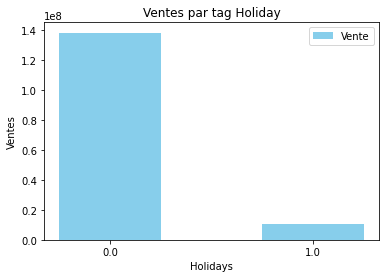

In [32]:
Bar_Hol = df.groupby("Holiday_Flag").Weekly_Sales.sum()

ind = np.arange(len(Bar_Hol))

plt.bar(ind, Bar_Hol, width = 0.5,
                color='SkyBlue', label='Vente')

plt.ylabel('Ventes')
plt.xlabel("Holidays")
plt.title("Ventes par tag Holiday")
plt.xticks(ind, Bar_Hol.index)
plt.legend()

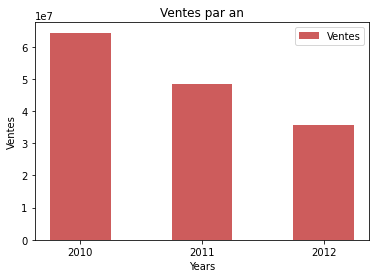

In [37]:
Bar_Year = df.groupby("Year").Weekly_Sales.sum()

ind = np.arange(len(Bar_Year))

plt.bar(ind , Bar_Year, width = 0.5,
                color='IndianRed', label='Ventes')

plt.ylabel('Ventes')
plt.xlabel("Years")
plt.title("Ventes par an")
plt.xticks(ind, Bar_Year.index)
plt.legend()

In [34]:
len(Bar_Year)

3

In [35]:
df["Holiday_Flag"]

50     0.0
14     0.0
61     0.0
20     0.0
47     0.0
      ... 
97     0.0
58     0.0
105    0.0
46     0.0
110    1.0
Name: Holiday_Flag, Length: 118, dtype: float64

### Pie Chart

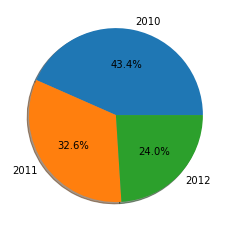

In [33]:
# on construit les groupes
Pie_Year = df.groupby("Year").Weekly_Sales.sum()

# on affiche le graphique
plt.pie(Pie_Year, 
        labels=Pie_Year.index, 
        autopct='%1.1f%%', shadow=True);

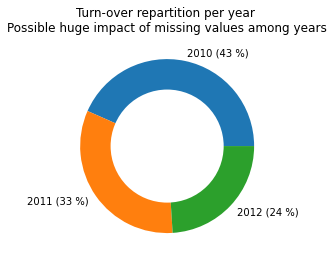

In [34]:
ca_per_year = df.groupby(['Year'])[['Weekly_Sales']].sum()

ca_per_year['(%)'] = [str(round(100 * x / ca_per_year.Weekly_Sales.sum())) for x in ca_per_year.Weekly_Sales]
ca_per_year = ca_per_year.reset_index().astype('str')
ca_per_year['(%)'] = ca_per_year.Year + ' (' + ca_per_year['(%)'] + ' %)'

#PLotting pie chart
ax = plt.pie(ca_per_year.Weekly_Sales,labels=ca_per_year['(%)']  )
centre_circle = plt.Circle((0,0),0.65,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Turn-over repartition per year \nPossible huge impact of missing values among years')
plt.show()

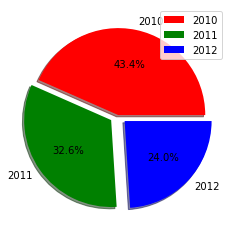

In [35]:
plt.pie(Pie_Year[:3], 
        labels=Pie_Year.index[:3],
           colors = ['red', 'green', 'blue'],
           explode = [0, 0.1, 0.1],
           autopct = '%1.1f%%',
           
           shadow = True)
plt.legend()

In [39]:
Pie_Year

Year
2010    64377268.83
2011    48389509.09
2012    35591216.59
Name: Weekly_Sales, dtype: float64

### Histograme

## Boxplots avec Seaborn

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Box plot du nombre de ventes par an')

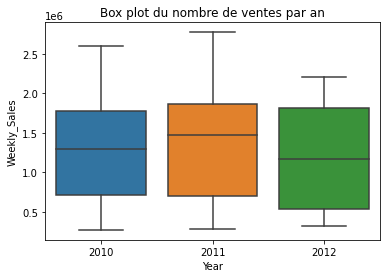

In [40]:
# Distribution des ventes par an
sns.boxplot(df["Year"], df["Weekly_Sales"])
plt.title("Box plot du nombre de ventes par an")

Les mediane sont à peu près equivalentes, la distribution l'est également 

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Box plot du nombre de ventes par an')

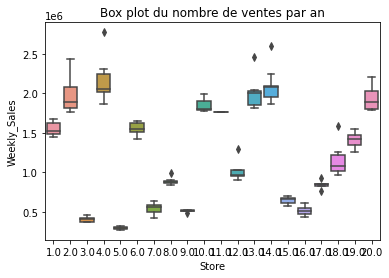

In [41]:
# Distribution des ventes par Store
sns.boxplot(df["Store"], df["Weekly_Sales"])
plt.title("Box plot du nombre de ventes par an")

Il existe une grande disparité dans les ventes entre les Stores en terme de CA 

In [42]:
df.shape[0]

118

In [43]:
df_test = df.copy()

In [44]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month'],
      dtype='object')

# Analyse de la donnée 

In [45]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ["Store", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]
target_variable = "Weekly_Sales"



X = df.loc[:,features_list]
Y = df.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
50    2035431.39
14     829207.27
61    1990371.02
20     561145.14
47    1549018.68
Name: Weekly_Sales, dtype: float64

X :
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
50   13.0           0.0        61.11       3.788  130.959226         5.965
14   17.0           0.0        60.07       2.853  126.234600         6.885
61   10.0           0.0        57.62       3.882  130.645793         7.545
20    7.0           0.0        38.26       2.725  189.704822         8.963
47   19.0           0.0        66.25       2.958  132.521867         8.099


In [46]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
# WARNING : don't forget stratify=Y for classification problems
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # pas besoin de mettre le Stratify car on cherche une variable numeric et non predire un oui ou non 
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [47]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[  6.          0.         78.89        2.759     212.412888    7.092    ]
 [ 12.          0.         68.4         4.193     129.0444333  13.736    ]
 [  6.          0.         59.61        3.045     214.7775231   6.858    ]
 [  8.          0.         82.92        3.554     219.0701968   6.425    ]
 [ 19.          0.         68.26        3.103     134.9425484   7.658    ]]
[[  3.          0.         80.19        3.467     219.7414914   7.567    ]
 [ 13.          0.         63.6         3.648     129.5183333   6.877    ]]

[1644470.66, 1021154.48, 1572117.54, 895066.5, 1467473.63]
[365248.94, 1847430.96]


## Training pipeline

In [48]:
# Missing values
print("Imputing missing values...")
print(X_train[0:5,:])
print()
numeric_indices = [2,3,4,5]
categorical_indices = [0,1]
imputer = SimpleImputer(strategy="mean")
X_train[:,numeric_indices] = imputer.fit_transform(X_train[:,numeric_indices])
print("...Fini!")
print(X_train[0:5,:]) 
print() 

Imputing missing values...
[[  6.          0.         78.89        2.759     212.412888    7.092    ]
 [ 12.          0.         68.4         4.193     129.0444333  13.736    ]
 [  6.          0.         59.61        3.045     214.7775231   6.858    ]
 [  8.          0.         82.92        3.554     219.0701968   6.425    ]
 [ 19.          0.         68.26        3.103     134.9425484   7.658    ]]

...Fini!
[[  6.          0.         78.89        2.759     212.412888    7.092    ]
 [ 12.          0.         68.4         4.193     129.0444333  13.736    ]
 [  6.          0.         59.61        3.045     214.7775231   6.858    ]
 [  8.          0.         82.92        3.554     219.0701968   6.425    ]
 [ 19.          0.         68.26        3.103     134.9425484   7.658    ]]



In [49]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...

[[  6.          0.         78.89        2.759     212.412888    7.092    ]
 [ 12.          0.         68.4         4.193     129.0444333  13.736    ]
 [  6.          0.         59.61        3.045     214.7775231   6.858    ]
 [  8.          0.         82.92        3.554     219.0701968   6.425    ]
 [ 19.          0.         68.26        3.103     134.9425484   7.658    ]]
...Done
  (0, 4)	1.0
  (0, 20)	1.000032082515343
  (0, 21)	-1.0122488520751478
  (0, 22)	0.912906507258933
  (0, 23)	-0.35128091290828
  (1, 10)	1.0
  (1, 20)	0.3915326192008236
  (1, 21)	1.9251926726352324
  (1, 22)	-1.184734269715482
  (1, 23)	3.498974900080234
  (2, 4)	1.0
  (2, 20)	-0.11835396636015186
  (2, 21)	-0.42639928717475145
  (2, 22)	0.9724032920593002
  (2, 23)	-0.4868859490671174
  (3, 6)	1.0
  (3, 20)	1.233802610366393
  (3, 21)	0.6162490643437859
  (3, 22)	1.0804116200026235
  (3, 23)	-0.7378132168311189
  (4, 17)	1.0
  (4, 20)	0.

In [50]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [51]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[1565950.71857654 1000825.36448217 1561585.20410006  840544.27133813
 1434678.62210637  285520.32400433 1031826.45765566  316851.34149202
 1529426.04490507  920251.80505264  563122.27352897  457467.21833769
 2203523.1979805   864652.93268008 1421087.94405468 1403648.22081778
 1569868.20580135 1587726.3982154   517421.34792588 2128865.50455443
 1058533.54338351 2130540.26564685 1506728.15377289 1033027.96769679
  918065.95249875 2274358.15512611  517961.93963944 2017523.17567855
  849326.50255489 2029915.0643607   267078.57038487  865622.67588424
 1425490.21466416 1822233.86688663 1918560.17679134 1076764.43108646
 1055595.88555822  770416.39390982 2013944.55312839 2077343.4134266
 2105619.08592006  418765.70455833 2067811.22667992 1609087.67604804
 2034504.58960763  561955.00969354  951347.3996276   524598.25221849
  365077.83113927  522305.93001928 2263131.31742492 2010717.02791045
 1757242.51147543  814884.09777103 1521890.47079443 1995621.9404

# Test pipeline

In [52]:
# Missing values
print("Imputing missing values...")
print(X_test[0:5,:])
print()

X_test[:,numeric_indices] = imputer.transform(X_test[:,numeric_indices])
print("...Done!")
print(X_test[0:5,:]) 
print() 

Imputing missing values...
[[  3.          0.         80.19        3.467     219.7414914   7.567    ]
 [ 13.          0.         63.6         3.648     129.5183333   6.877    ]
 [ 20.          0.         75.17        2.808     204.5675459   7.856    ]
 [ 19.          0.         50.76        4.124     138.0332      8.15     ]
 [ 20.          0.         69.37        3.57      129.0663      7.527    ]]

...Done!
[[  3.          0.         80.19        3.467     219.7414914   7.567    ]
 [ 13.          0.         63.6         3.648     129.5183333   6.877    ]
 [ 20.          0.         75.17        2.808     204.5675459   7.856    ]
 [ 19.          0.         50.76        4.124     138.0332      8.15     ]
 [ 20.          0.         69.37        3.57      129.0663      7.527    ]]



In [53]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test[0:5,:])

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...

[[  3.          0.         80.19        3.467     219.7414914   7.567    ]
 [ 13.          0.         63.6         3.648     129.5183333   6.877    ]
 [ 20.          0.         75.17        2.808     204.5675459   7.856    ]
 [ 19.          0.         50.76        4.124     138.0332      8.15     ]
 [ 20.          0.         69.37        3.57      129.0663      7.527    ]]
...Done
  (0, 1)	1.0
  (0, 20)	1.07544193020923
  (0, 21)	0.4380360848111484
  (0, 22)	1.0973021205089575
  (0, 23)	-0.07601427967987193
  (1, 11)	1.0
  (1, 20)	0.11309625848493252
  (1, 21)	0.8088010192411197
  (1, 22)	-1.1728104315229022
  (1, 23)	-0.47587528373797944
  (2, 18)	1.0
  (2, 20)	0.7842439029605277
  (2, 21)	-0.911876024522282
  (2, 22)	0.7155091876433393
  (2, 23)	0.09146373506330682
  (3, 17)	1.0
  (3, 20)	-0.6317210064300757
  (3, 21)	1.7838513440403798
  (3, 22)	-0.9585671465214642
  (3, 23)	0.26183929331415345
  (4, 18)	1.0
  (4

In [54]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[ 340947.26314532 2024607.28994549 2214324.55910611 1341012.77108647
 2467258.928397    521726.39563484  579278.11230315  434481.12399679
  745241.65396514  370907.28878628  302762.03885431  266776.79645508
 1796808.98745096 2001563.12949681 2244272.09316943 1520011.50612625
 2152925.43347737 1917424.68728651 2178046.4181395   516460.14166367
 1091256.58726766 1055785.48788895 1074527.2171686   578468.67262199]



In [55]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9630827539441151
R2 score on test set :  0.8888592243510145


In [56]:
compa_Y = pd.DataFrame({'reality':Y_test, 'predi':Y_test_pred})

In [57]:
compa_Y.head()

,reality,predi
0,365248.94,3.409473e+05
1,1847430.96,2.024607e+06
2,1973135.87,2.214325e+06
3,1405007.44,1.341013e+06
4,1789687.65,2.467259e+06


### Cross-validated score for a Ridge model (with default value of \lambdaλ)

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

In [59]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("3-fold cross-validation...")
regressor = Ridge()
scores = cross_val_score(regressor, X_train, Y_train, cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

3-fold cross-validation...
The cross-validated R2-score is :  0.7559692496591984
The standard deviation is :  0.04862839171933966


### Grid search : tune \lambdaλ

In [60]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.8711518365057835


In [61]:
# Predictions on training set
# The model has already be re-trained on all the training set at the end of the grid search, so we can directly use it !
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[1566485.58500311 1000025.88903737 1561580.59937612  840240.51122402
 1434890.3013459   285843.2681458  1032357.78611508  316862.71211408
 1529418.19433111  920255.8558822   564002.62508113  455859.93991064
 2203320.99093843  864540.76566943 1420740.4707604  1402763.14556726
 1570177.95894127 1588310.13123496  518349.44036223 2128498.05225191
 1059067.63011369 2130569.16296731 1507280.24301204 1032380.21453121
  918042.97570407 2274293.44316165  518290.48565726 2017408.23704275
  849559.83112456 2029906.79734978  266774.89510784  865070.36255458
 1425721.22610773 1821860.04576734 1918805.75217181 1077293.18059584
 1055544.18957771  770145.71249674 2014517.67861249 2077008.54803544
 2105850.85921925  418616.10598273 2067524.74230438 1609510.67818638
 2034191.74842877  561459.67130491  950919.26078807  522847.11122245
  364279.80486182  522939.82692187 2262921.88864217 2010214.81879956
 1753971.47820765  815066.83908362 1521616.33384437 1995966.341

### Test pipeline

In [62]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[ 340338.5170092  2024444.16612839 2215230.84975231 1340357.67181542
 2467116.51806407  523842.01287159  579208.52046887  433564.4094163
  743476.72461087  370046.18087232  302717.61370598  267125.35582388
 1795710.04475588 2002269.36450538 2244445.505878   1520160.64882763
 2152536.5539976  1918119.74806216 2178119.40519767  514046.76781561
 1091090.19152014 1055719.50316358 1075556.20446424  579226.32000545]



In [63]:
# Print R^2 scores on train/test sets for the Ridge model with optimal value of the regularization strength
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9630815683766628
R2 score on test set :  0.8889034390801711
